In [18]:
import math
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.interpolate import interp1d
import seaborn as sns
from scipy.stats import linregress
from sys import exit

import PythonGraphMod

In [23]:
data_file_list = ['frequency1.ods', 'frequency2.ods', 'frequency3.ods', 'frequency4.ods']
frequency_list = [1.03678, 1.07482, 1.10083, 1.22206] # МГц

def CreateGraphic(filename: str, frequency):
    file = '../data/' + filename
    # открваем файлы с данными, получаем файловые дескрипторы
    fd = pd.read_excel(file)
    # импортируем эксперементальные данные в массивы
    n = np.array(fd['n'])
    x = np.array(fd['x, мкм'])

    # используем функцию линейной регрессии
    lin = linregress(n, x)

    fig, ax = PythonGraphMod.CreateSimpleGraph()
    ax.scatter(n, x, color='black', marker='o', s=8, alpha=1)
    ax.plot(n, lin.intercept + lin.slope * n, color='red', alpha=0.75, lw=1.5, ls='--')

    # сетка
    ax.minorticks_on()
    ax.grid(which = 'major', color = 'black', linewidth = 1, linestyle = '-', alpha = 0.75)
    ax.grid(which = 'minor', color = 'grey', linewidth = 1, linestyle = '--', alpha = 0.5)

    # оформление
    plt.title(r'Рабочая частота $\nu$ = %0.3lf МГц' %frequency)
    plt.ylabel('x, мкм')
    plt.xlabel('n')
    ax.text(-3, 380, r'Slope $\alpha$ = %0.2lf $\pm$ %0.2lf мкм' %(lin.slope, lin.stderr), 
        size = 13,
        bbox=dict(facecolor='white', edgecolor='black', pad=10.0))

    fig.savefig("../images/" + filename + ".pdf")

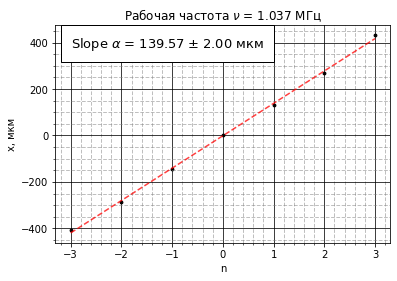

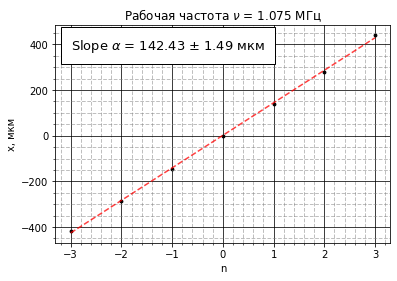

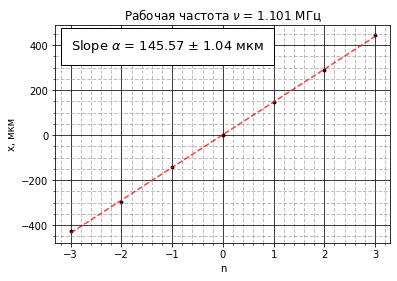

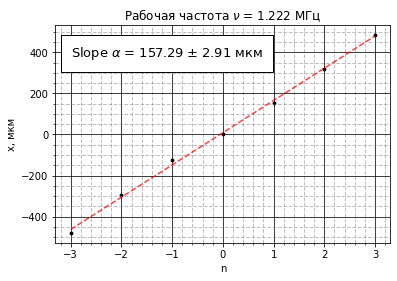

In [24]:
if len(data_file_list) != len(frequency_list):
    print('error, amount data file is not the same frequencies')
    exit(1)

for i in range(len(data_file_list)):
    CreateGraphic(data_file_list[i], frequency_list[i])